In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37           9720        219  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          38912       1117  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)            139KB  2023-09-29 13:39:28           5166        136  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-202

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset
! unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
import cv2
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir = '/content/Face Mask Dataset/Train'
test_dir = '/content/Face Mask Dataset/Test'
val_dir = '/content/Face Mask Dataset/Validation'

In [ ]:
data_train = image_dataset_from_directory(train_dir,labels='inferred',label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,shuffle=True)

data_validation = image_dataset_from_directory(val_dir,labels='inferred',label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,shuffle=True)

data_test = image_dataset_from_directory(test_dir,labels='inferred',label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,shuffle=True)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


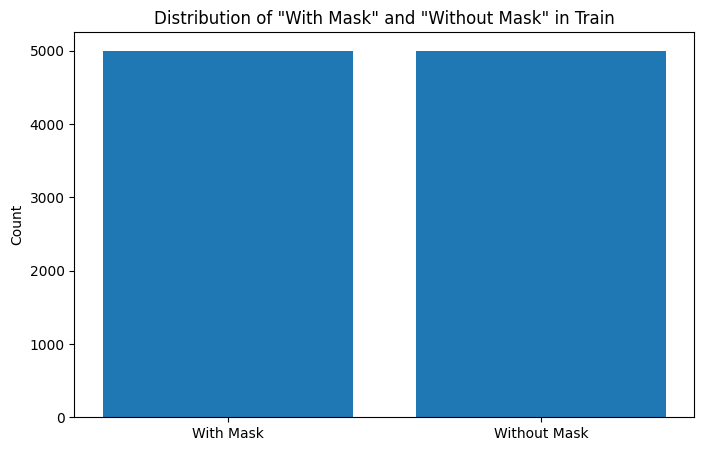

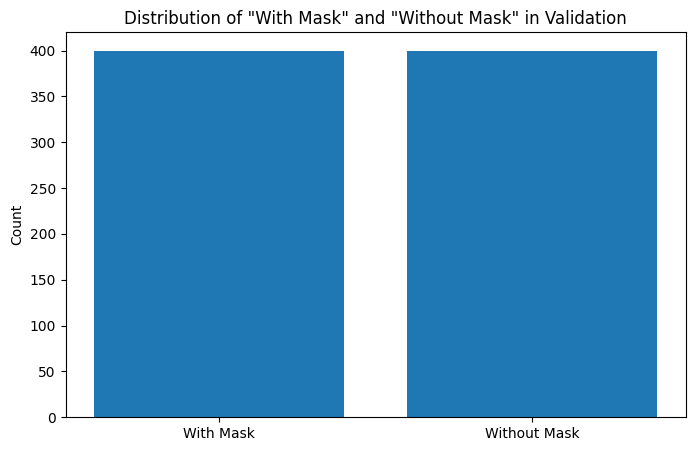

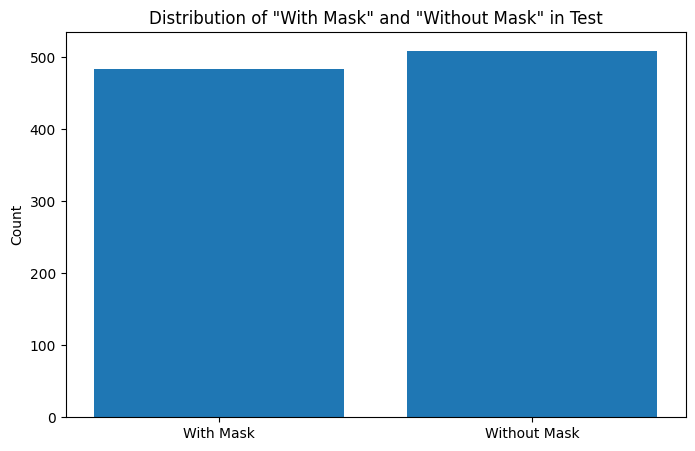

In [ ]:
# Create a function to visualize class distribution
def visualize_class_distribution(dataset, title):
    with_mask_count = 0
    without_mask_count = 0

    for images, labels in dataset:
        with_mask_count += tf.reduce_sum(tf.where(labels == 0, 1, 0))
        without_mask_count += tf.reduce_sum(tf.where(labels == 1, 1, 0))

    # Create a bar plot
    class_labels = ["With Mask", "Without Mask"]
    counts = [with_mask_count, without_mask_count]

    plt.figure(figsize=(8, 5))
    plt.bar(class_labels, counts)
    plt.title(f'Distribution of "With Mask" and "Without Mask" in {title}')
    plt.ylabel('Count')
    plt.show()

# Visualize the distribution in the train dataset
visualize_class_distribution(data_train, "Train")

# Visualize the distribution in the validation dataset
visualize_class_distribution(data_validation, "Validation")

# Visualize the distribution in the test dataset
visualize_class_distribution(data_test, "Test")

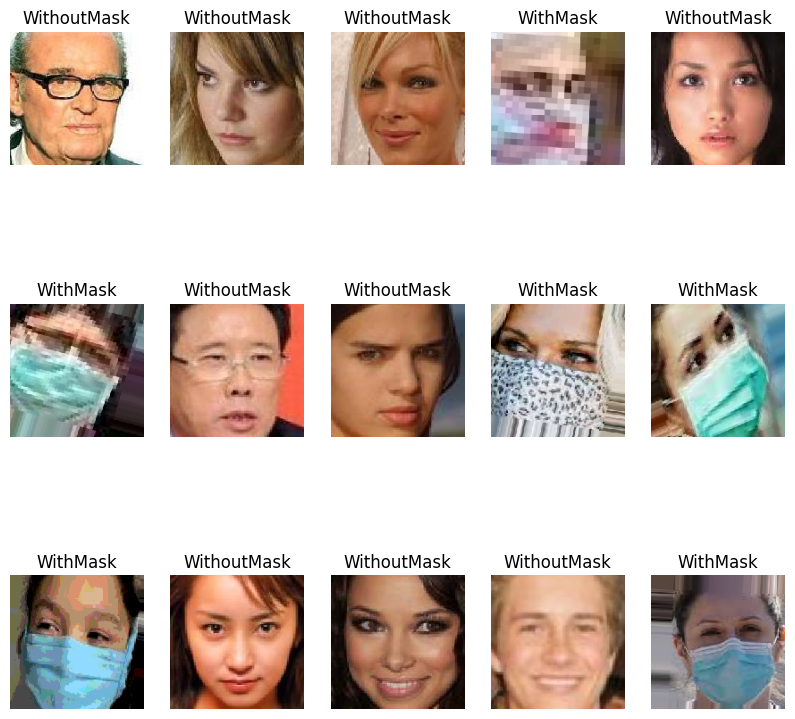

In [ ]:
classes_train = data_train.class_names
plt.figure(figsize=(10,10))
for img, label in data_train.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(classes_train[int(label[i])])
        plt.axis('off')

In [ ]:
# Image size
IMG_SIZE = (256, 256)

# data argumentation
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                       rotation_range=45,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=True
                                       )

# data argumentation
test_datagen = ImageDataGenerator(rescale= 1 / 255.0)

train_dataset = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE),
                                         color_mode="rgb",
                                         batch_size=200,
                                         shuffle=True,
                                         class_mode="categorical")

test_dataset = test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE),
                                         color_mode="rgb",
                                         batch_size=64,
                                         shuffle=True,
                                         class_mode="categorical")

validation_dataset = train_datagen.flow_from_directory(val_dir, target_size=(IMG_SIZE),
                                         color_mode="rgb",
                                         batch_size=64,
                                         shuffle=True,
                                         class_mode="categorical")

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
# using mobilenetv2 model
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(256,256,3))
# make pre trained model into non trainable bcoz its takes much time
for layer in mobilenet.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Initialize the model in sequential
model = Sequential()
# add MobileNetV2 model into our sequence model
model.add(mobilenet)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 128)               10485888  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 12744130 (48.61 MB)
Trainable params: 10486146 (40.00 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=5,
                              verbose=1)

Epoch 1/5
50/50 [==============================] - 188s 4s/step - loss: 0.8491 - accuracy: 0.9279 - val_loss: 0.0538 - val_accuracy: 0.9825
Epoch 2/5
50/50 [==============================] - 172s 3s/step - loss: 0.0548 - accuracy: 0.9814 - val_loss: 0.0406 - val_accuracy: 0.9900
Epoch 3/5
50/50 [==============================] - 170s 3s/step - loss: 0.0349 - accuracy: 0.9877 - val_loss: 0.0369 - val_accuracy: 0.9862
Epoch 4/5
50/50 [==============================] - 180s 4s/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0238 - val_accuracy: 0.9937
Epoch 5/5
50/50 [==============================] - 176s 4s/step - loss: 0.0291 - accuracy: 0.9889 - val_loss: 0.0303 - val_accuracy: 0.9887


In [ ]:
model.evaluate(validation_dataset)

13/13 [==============================] - 13s 942ms/step - loss: 0.0303 - accuracy: 0.9900


[0.03031185083091259, 0.9900000095367432]

In [ ]:
test_pred = model.predict(test_dataset)

16/16 [==============================] - 4s 190ms/step


In [ ]:
output = [np.argmax(op) for op in test_pred]
df_output = pd.DataFrame(output)
print(df_output.value_counts())

1    499
0    493
dtype: int64


In [ ]:
def img_preprocessing(path):
    sample_mask_img = cv2.imread(path)
    sample_mask_img = cv2.resize(sample_mask_img,(256,256))
    plt.imshow(sample_mask_img)
    sample_mask_img = np.reshape(sample_mask_img,[1,256,256,3])
    sample_mask_img = sample_mask_img/255.0
    res = np.argmax(model.predict(sample_mask_img))
    print('            ', colored(classes_train[res], "green"))

1/1 [==============================] - 2s 2s/step
             WithoutMask


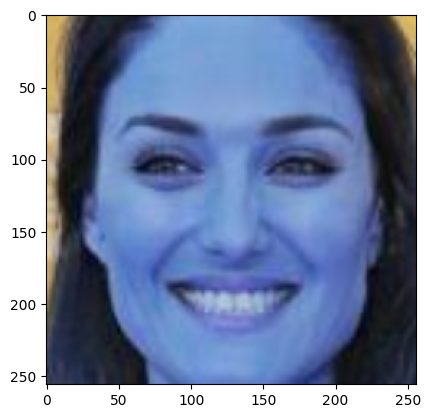

In [ ]:
img_preprocessing('/content/Face Mask Dataset/Validation/WithoutMask/1003.png')

1/1 [==============================] - 0s 24ms/step
             WithMask


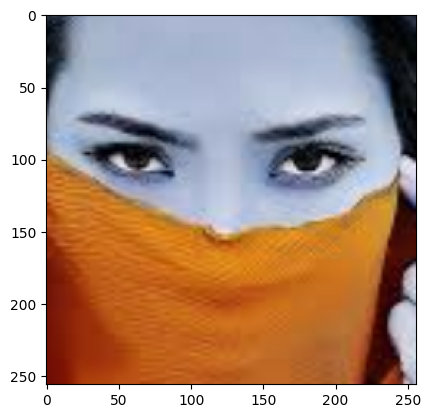

In [ ]:
img_preprocessing('/content/Face Mask Dataset/Validation/WithMask/1003.png')

In [ ]:
model.save("face-mask-detection.h5")

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model("/content/face-mask-detection.h5")

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)


take_photo()

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

1/1 [==============================] - 0s 119ms/step
             WithMask


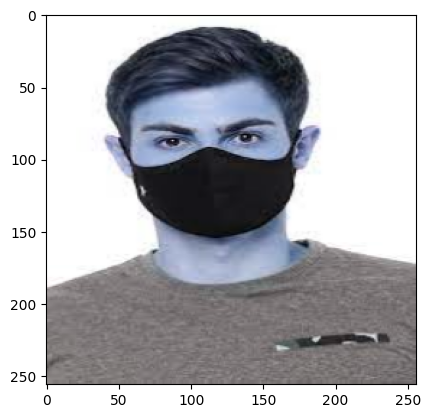

In [ ]:
img_preprocessing('/content/download.jpeg')

1/1 [==============================] - 0s 36ms/step
             WithoutMask


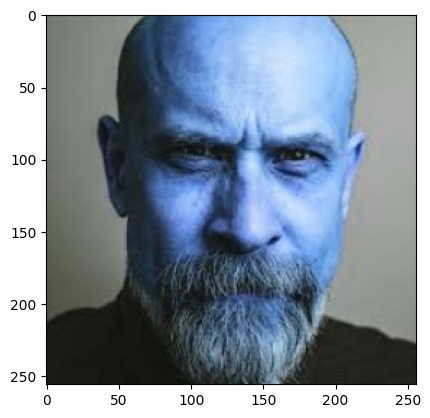

In [ ]:
img_preprocessing('/content/download (1).jpeg')

1/1 [==============================] - 0s 46ms/step
             WithoutMask


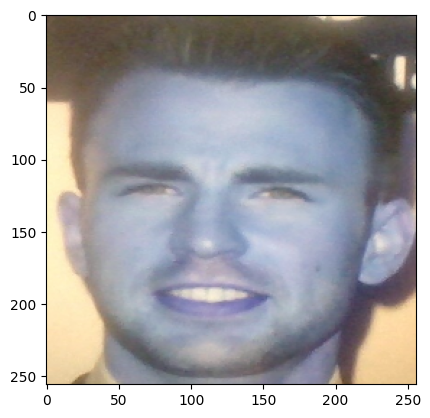

In [ ]:
img_preprocessing('/content/WIN_20231024_19_03_16_Pro.jpg')

1/1 [==============================] - 0s 199ms/step
             WithoutMask


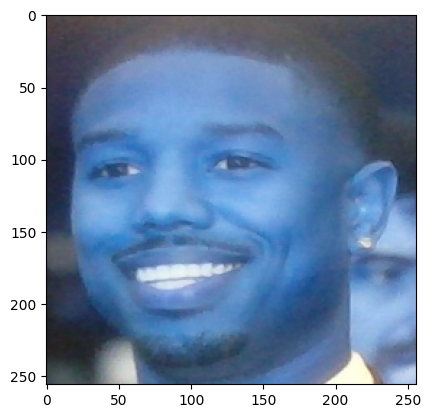

In [ ]:
img_preprocessing('/content/WIN_20231024_19_06_17_Pro.jpg')